In [140]:
import os
import json
import pandas as pd
from docx import Document
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.utils import resample
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from scipy.optimize import minimize
from scipy.spatial.distance import cdist
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

In [3]:
folder_path = r'C:\Users\Hp\Desktop\Semester7\Deep learning\Flights Data'
all_data = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.docx'):
        file_path = os.path.join(folder_path, file_name)
        doc = Document(file_path)
        full_text = ""
        for para in doc.paragraphs:
            full_text += para.text

        try:
            json_data = json.loads(full_text)
            normalized_data = pd.json_normalize(json_data, sep='_')
            all_data.append(normalized_data)

        except json.JSONDecodeError:
            print(f"Error parsing JSON in {file_name}")
        except Exception as e:
            print(f"An error occurred with file {file_name}: {e}")

if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    #print(final_df.head())
    
    final_df.to_csv('combined_flight_data.csv', index=False)

In [33]:
final_df = pd.read_csv(r"combined_flight_data.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19788\3131353281.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df = pd.read_csv(r"combined_flight_data.csv")


In [34]:
#final_df

In [35]:
final_df = final_df[final_df['status'] == 'active']
final_df=final_df.reset_index()
final_df

,index,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_delay,departure_scheduledTime,departure_estimatedTime,arrival_iataCode,...,departure_estimatedRunway,departure_actualRunway,arrival_estimatedTime,arrival_baggage,arrival_delay,arrival_gate,departure_gate,arrival_actualTime,arrival_estimatedRunway,arrival_actualRunway
0,0,departure,active,lhe,opla,m,10.0,2023-07-13t06:00:00.000,2023-07-13t06:10:00.000,ist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,departure,active,lhe,opla,m,10.0,2023-07-13t06:00:00.000,2023-07-13t06:10:00.000,ist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,departure,active,lhe,opla,m,20.0,2023-07-13t06:50:00.000,2023-07-13t07:10:00.000,jed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,departure,active,lhe,opla,m,NaN,2023-07-13t07:05:00.000,2023-07-13t07:05:00.000,cmb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,departure,active,lhe,opla,m,NaN,2023-07-13t07:05:00.000,2023-07-13t07:05:00.000,cmb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75892,81387,departure,active,lhe,opla,main,52.0,2023-12-01t03:20:00.000,2023-12-01t04:12:00.000,dxb,...,NaN,NaN,NaN,03,NaN,NaN,NaN,NaN,NaN,NaN
75893,81388,departure,active,lhe,opla,main,52.0,2023-12-01t03:20:00.000,2023-12-01t04:12:00.000,dxb,...,NaN,NaN,NaN,03,NaN,NaN,NaN,NaN,NaN,NaN
75894,81389,departure,active,lhe,opla,m,31.0,2023-12-01t04:20:00.000,2023-12-01t04:35:00.000,auh,...,2023-12-01t04:51:00.000,2023-12-01t04:51:00.000,2023-12-01t07:01:00.000,NaN,NaN,c32,24,NaN,NaN,NaN
75895,81390,departure,active,lhe,opla,m,31.0,2023-12-01t04:20:00.000,2023-12-01t04:35:00.000,auh,...,2023-12-01t04:51:00.000,2023-12-01t04:51:00.000,2023-12-01t07:01:00.000,NaN,NaN,c32,24,NaN,NaN,NaN


In [36]:
final_df = final_df.drop(columns=['index'])

In [37]:
final_df

,type,status,departure_iataCode,departure_icaoCode,departure_terminal,departure_delay,departure_scheduledTime,departure_estimatedTime,arrival_iataCode,arrival_icaoCode,...,departure_estimatedRunway,departure_actualRunway,arrival_estimatedTime,arrival_baggage,arrival_delay,arrival_gate,departure_gate,arrival_actualTime,arrival_estimatedRunway,arrival_actualRunway
0,departure,active,lhe,opla,m,10.0,2023-07-13t06:00:00.000,2023-07-13t06:10:00.000,ist,ltfm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,departure,active,lhe,opla,m,10.0,2023-07-13t06:00:00.000,2023-07-13t06:10:00.000,ist,ltfm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,departure,active,lhe,opla,m,20.0,2023-07-13t06:50:00.000,2023-07-13t07:10:00.000,jed,oejn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,departure,active,lhe,opla,m,NaN,2023-07-13t07:05:00.000,2023-07-13t07:05:00.000,cmb,vcbi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,departure,active,lhe,opla,m,NaN,2023-07-13t07:05:00.000,2023-07-13t07:05:00.000,cmb,vcbi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75892,departure,active,lhe,opla,main,52.0,2023-12-01t03:20:00.000,2023-12-01t04:12:00.000,dxb,omdb,...,NaN,NaN,NaN,03,NaN,NaN,NaN,NaN,NaN,NaN
75893,departure,active,lhe,opla,main,52.0,2023-12-01t03:20:00.000,2023-12-01t04:12:00.000,dxb,omdb,...,NaN,NaN,NaN,03,NaN,NaN,NaN,NaN,NaN,NaN
75894,departure,active,lhe,opla,m,31.0,2023-12-01t04:20:00.000,2023-12-01t04:35:00.000,auh,omaa,...,2023-12-01t04:51:00.000,2023-12-01t04:51:00.000,2023-12-01t07:01:00.000,NaN,NaN,c32,24,NaN,NaN,NaN
75895,departure,active,lhe,opla,m,31.0,2023-12-01t04:20:00.000,2023-12-01t04:35:00.000,auh,omaa,...,2023-12-01t04:51:00.000,2023-12-01t04:51:00.000,2023-12-01t07:01:00.000,NaN,NaN,c32,24,NaN,NaN,NaN


In [38]:
final_df.isna().sum()

type                                0
status                              0
departure_iataCode                  0
departure_icaoCode                  0
departure_terminal              31988
departure_delay                 23543
departure_scheduledTime             0
departure_estimatedTime          6348
arrival_iataCode                    0
arrival_icaoCode                    0
arrival_scheduledTime               0
airline_name                        0
airline_iataCode                   40
airline_icaoCode                    0
flight_number                       0
flight_iataNumber                  40
flight_icaoNumber                   0
codeshared_airline_name         50911
codeshared_airline_iataCode     50911
codeshared_airline_icaoCode     50911
codeshared_flight_number        50911
codeshared_flight_iataNumber    50911
codeshared_flight_icaoNumber    50911
arrival_terminal                45084
departure_actualTime            27635
departure_estimatedRunway       27635
departure_ac

In [39]:
columns_to_drop = [
    'codeshared_airline_name',
    'codeshared_airline_iataCode',
    'codeshared_airline_icaoCode',
    'codeshared_flight_number',
    'codeshared_flight_iataNumber',
    'codeshared_flight_icaoNumber',
    'arrival_terminal',
    'arrival_baggage',
    'arrival_delay',
    'arrival_gate',
    
    'departure_gate',
    'arrival_actualTime',
    'arrival_estimatedRunway',
    'arrival_actualRunway',
   'departure_estimatedTime',
    'departure_actualTime',
    'departure_estimatedRunway',
    'departure_actualRunway',
    'arrival_estimatedTime',
    'status',
]
existing_columns_to_drop = [col for col in columns_to_drop if col in final_df.columns]
final_df = final_df.drop(columns=existing_columns_to_drop)
final_df


,type,departure_iataCode,departure_icaoCode,departure_terminal,departure_delay,departure_scheduledTime,arrival_iataCode,arrival_icaoCode,arrival_scheduledTime,airline_name,airline_iataCode,airline_icaoCode,flight_number,flight_iataNumber,flight_icaoNumber
0,departure,lhe,opla,m,10.0,2023-07-13t06:00:00.000,ist,ltfm,2023-07-13t10:45:00.000,pakistan international airlines,pk,pia,5715,pk5715,pia5715
1,departure,lhe,opla,m,10.0,2023-07-13t06:00:00.000,ist,ltfm,2023-07-13t10:45:00.000,turkish airlines,tk,thy,715,tk715,thy715
2,departure,lhe,opla,m,20.0,2023-07-13t06:50:00.000,jed,oejn,2023-07-13t10:10:00.000,pakistan international airlines,pk,pia,859,pk859,pia859
3,departure,lhe,opla,m,NaN,2023-07-13t07:05:00.000,cmb,vcbi,2023-07-13t11:30:00.000,malaysia airlines,mh,mas,9032,mh9032,mas9032
4,departure,lhe,opla,m,NaN,2023-07-13t07:05:00.000,cmb,vcbi,2023-07-13t11:30:00.000,srilankan airlines,ul,alk,154,ul154,alk154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75892,departure,lhe,opla,main,52.0,2023-12-01t03:20:00.000,dxb,omdb,2023-12-01t05:50:00.000,air canada,ac,aca,7617,ac7617,aca7617
75893,departure,lhe,opla,main,52.0,2023-12-01t03:20:00.000,dxb,omdb,2023-12-01t05:50:00.000,emirates,ek,uae,623,ek623,uae623
75894,departure,lhe,opla,m,31.0,2023-12-01t04:20:00.000,auh,omaa,2023-12-01t07:05:00.000,klm,kl,klm,3932,kl3932,klm3932
75895,departure,lhe,opla,m,31.0,2023-12-01t04:20:00.000,auh,omaa,2023-12-01t07:05:00.000,etihad airways,ey,etd,242,ey242,etd242


In [40]:
final_df.isna().sum()

type                           0
departure_iataCode             0
departure_icaoCode             0
departure_terminal         31988
departure_delay            23543
departure_scheduledTime        0
arrival_iataCode               0
arrival_icaoCode               0
arrival_scheduledTime          0
airline_name                   0
airline_iataCode              40
airline_icaoCode               0
flight_number                  0
flight_iataNumber             40
flight_icaoNumber              0
dtype: int64

In [41]:
mode_terminal = final_df['departure_terminal'].mode()[0]
final_df['departure_terminal'].fillna(mode_terminal, inplace=True)

median_delay = final_df['departure_delay'].median()
final_df['departure_delay'].fillna(median_delay, inplace=True)

mode_airline_iata = final_df['airline_iataCode'].mode()[0]
final_df['airline_iataCode'].fillna(mode_airline_iata, inplace=True)

mode_flight_iata = final_df['flight_iataNumber'].mode()[0]
final_df['flight_iataNumber'].fillna(mode_flight_iata, inplace=True)


In [42]:
final_df.isna().sum()

type                       0
departure_iataCode         0
departure_icaoCode         0
departure_terminal         0
departure_delay            0
departure_scheduledTime    0
arrival_iataCode           0
arrival_icaoCode           0
arrival_scheduledTime      0
airline_name               0
airline_iataCode           0
airline_icaoCode           0
flight_number              0
flight_iataNumber          0
flight_icaoNumber          0
dtype: int64

In [43]:
final_df['departure_scheduledTime_dt'] = pd.to_datetime(final_df['departure_scheduledTime'])
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"
final_df['departure_time_of_day'] = final_df['departure_scheduledTime_dt'].dt.hour.apply(time_of_day)
final_df

,type,departure_iataCode,departure_icaoCode,departure_terminal,departure_delay,departure_scheduledTime,arrival_iataCode,arrival_icaoCode,arrival_scheduledTime,airline_name,airline_iataCode,airline_icaoCode,flight_number,flight_iataNumber,flight_icaoNumber,departure_scheduledTime_dt,departure_time_of_day
0,departure,lhe,opla,m,10.0,2023-07-13t06:00:00.000,ist,ltfm,2023-07-13t10:45:00.000,pakistan international airlines,pk,pia,5715,pk5715,pia5715,2023-07-13 06:00:00,Morning
1,departure,lhe,opla,m,10.0,2023-07-13t06:00:00.000,ist,ltfm,2023-07-13t10:45:00.000,turkish airlines,tk,thy,715,tk715,thy715,2023-07-13 06:00:00,Morning
2,departure,lhe,opla,m,20.0,2023-07-13t06:50:00.000,jed,oejn,2023-07-13t10:10:00.000,pakistan international airlines,pk,pia,859,pk859,pia859,2023-07-13 06:50:00,Morning
3,departure,lhe,opla,m,16.0,2023-07-13t07:05:00.000,cmb,vcbi,2023-07-13t11:30:00.000,malaysia airlines,mh,mas,9032,mh9032,mas9032,2023-07-13 07:05:00,Morning
4,departure,lhe,opla,m,16.0,2023-07-13t07:05:00.000,cmb,vcbi,2023-07-13t11:30:00.000,srilankan airlines,ul,alk,154,ul154,alk154,2023-07-13 07:05:00,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75892,departure,lhe,opla,main,52.0,2023-12-01t03:20:00.000,dxb,omdb,2023-12-01t05:50:00.000,air canada,ac,aca,7617,ac7617,aca7617,2023-12-01 03:20:00,Night
75893,departure,lhe,opla,main,52.0,2023-12-01t03:20:00.000,dxb,omdb,2023-12-01t05:50:00.000,emirates,ek,uae,623,ek623,uae623,2023-12-01 03:20:00,Night
75894,departure,lhe,opla,m,31.0,2023-12-01t04:20:00.000,auh,omaa,2023-12-01t07:05:00.000,klm,kl,klm,3932,kl3932,klm3932,2023-12-01 04:20:00,Night
75895,departure,lhe,opla,m,31.0,2023-12-01t04:20:00.000,auh,omaa,2023-12-01t07:05:00.000,etihad airways,ey,etd,242,ey242,etd242,2023-12-01 04:20:00,Night


In [44]:
final_df['arrival_scheduledTime'] = pd.to_datetime(final_df['arrival_scheduledTime'])
final_df['scheduled_flight_duration'] = final_df['arrival_scheduledTime'] - final_df['departure_scheduledTime_dt']
final_df['scheduled_flight_duration_hours'] = final_df['scheduled_flight_duration'].dt.total_seconds() / 3600

In [45]:
final_df['scheduled_flight_duration_hours'] = final_df['scheduled_flight_duration_hours'].round(2)

In [46]:
final_df = final_df.drop(columns=['departure_scheduledTime', 'departure_scheduledTime_dt' , 'arrival_scheduledTime' , 'scheduled_flight_duration'])

In [47]:
final_df

,type,departure_iataCode,departure_icaoCode,departure_terminal,departure_delay,arrival_iataCode,arrival_icaoCode,airline_name,airline_iataCode,airline_icaoCode,flight_number,flight_iataNumber,flight_icaoNumber,departure_time_of_day,scheduled_flight_duration_hours
0,departure,lhe,opla,m,10.0,ist,ltfm,pakistan international airlines,pk,pia,5715,pk5715,pia5715,Morning,4.75
1,departure,lhe,opla,m,10.0,ist,ltfm,turkish airlines,tk,thy,715,tk715,thy715,Morning,4.75
2,departure,lhe,opla,m,20.0,jed,oejn,pakistan international airlines,pk,pia,859,pk859,pia859,Morning,3.33
3,departure,lhe,opla,m,16.0,cmb,vcbi,malaysia airlines,mh,mas,9032,mh9032,mas9032,Morning,4.42
4,departure,lhe,opla,m,16.0,cmb,vcbi,srilankan airlines,ul,alk,154,ul154,alk154,Morning,4.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75892,departure,lhe,opla,main,52.0,dxb,omdb,air canada,ac,aca,7617,ac7617,aca7617,Night,2.50
75893,departure,lhe,opla,main,52.0,dxb,omdb,emirates,ek,uae,623,ek623,uae623,Night,2.50
75894,departure,lhe,opla,m,31.0,auh,omaa,klm,kl,klm,3932,kl3932,klm3932,Night,2.75
75895,departure,lhe,opla,m,31.0,auh,omaa,etihad airways,ey,etd,242,ey242,etd242,Night,2.75


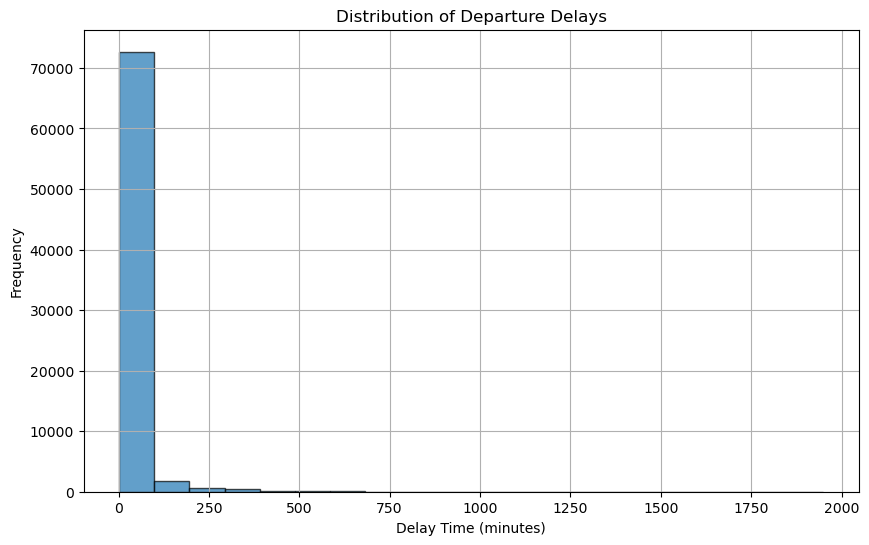

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(final_df['departure_delay'].dropna(), bins=20, edgecolor='black', alpha=0.7)  # Adjust 'bins' as needed
plt.title('Distribution of Departure Delays')
plt.xlabel('Delay Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [49]:
bins = [0, 15, 30, 60, 120, 240, 360, 600, float('inf')]
labels = ['0-15', '16-30', '31-60 ', '61-120 ', '121-240 ', '241-360 ', '361-600 ', '600+']
final_df['delay_bin'] = pd.cut(final_df['departure_delay'], bins=bins, labels=labels, right=False)
print(final_df[['departure_delay', 'delay_bin']].head())

   departure_delay delay_bin
0             10.0      0-15
1             10.0      0-15
2             20.0     16-30
3             16.0     16-30
4             16.0     16-30


In [50]:
final_df.delay_bin.value_counts()

delay_bin
16-30       39737
0-15        23597
31-60        7489
61-120       2226
121-240      1606
241-360       616
361-600       453
600+          173
Name: count, dtype: int64

In [51]:
final_df = final_df.drop('departure_delay', axis=1)
final_df

,type,departure_iataCode,departure_icaoCode,departure_terminal,arrival_iataCode,arrival_icaoCode,airline_name,airline_iataCode,airline_icaoCode,flight_number,flight_iataNumber,flight_icaoNumber,departure_time_of_day,scheduled_flight_duration_hours,delay_bin
0,departure,lhe,opla,m,ist,ltfm,pakistan international airlines,pk,pia,5715,pk5715,pia5715,Morning,4.75,0-15
1,departure,lhe,opla,m,ist,ltfm,turkish airlines,tk,thy,715,tk715,thy715,Morning,4.75,0-15
2,departure,lhe,opla,m,jed,oejn,pakistan international airlines,pk,pia,859,pk859,pia859,Morning,3.33,16-30
3,departure,lhe,opla,m,cmb,vcbi,malaysia airlines,mh,mas,9032,mh9032,mas9032,Morning,4.42,16-30
4,departure,lhe,opla,m,cmb,vcbi,srilankan airlines,ul,alk,154,ul154,alk154,Morning,4.42,16-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75892,departure,lhe,opla,main,dxb,omdb,air canada,ac,aca,7617,ac7617,aca7617,Night,2.50,31-60
75893,departure,lhe,opla,main,dxb,omdb,emirates,ek,uae,623,ek623,uae623,Night,2.50,31-60
75894,departure,lhe,opla,m,auh,omaa,klm,kl,klm,3932,kl3932,klm3932,Night,2.75,31-60
75895,departure,lhe,opla,m,auh,omaa,etihad airways,ey,etd,242,ey242,etd242,Night,2.75,31-60


In [53]:
essential_columns = [
    'type',
    'departure_iataCode',
    'departure_terminal',
    'arrival_iataCode',
    'airline_name',
    'airline_iataCode',
    'airline_icaoCode',
    'flight_number',
    'departure_time_of_day',
    'scheduled_flight_duration_hours',
    'delay_bin'   
]

df = final_df[essential_columns]
df


,type,departure_iataCode,departure_terminal,arrival_iataCode,airline_name,airline_iataCode,airline_icaoCode,flight_number,departure_time_of_day,scheduled_flight_duration_hours,delay_bin
0,departure,lhe,m,ist,pakistan international airlines,pk,pia,5715,Morning,4.75,0-15
1,departure,lhe,m,ist,turkish airlines,tk,thy,715,Morning,4.75,0-15
2,departure,lhe,m,jed,pakistan international airlines,pk,pia,859,Morning,3.33,16-30
3,departure,lhe,m,cmb,malaysia airlines,mh,mas,9032,Morning,4.42,16-30
4,departure,lhe,m,cmb,srilankan airlines,ul,alk,154,Morning,4.42,16-30
...,...,...,...,...,...,...,...,...,...,...,...
75892,departure,lhe,main,dxb,air canada,ac,aca,7617,Night,2.50,31-60
75893,departure,lhe,main,dxb,emirates,ek,uae,623,Night,2.50,31-60
75894,departure,lhe,m,auh,klm,kl,klm,3932,Night,2.75,31-60
75895,departure,lhe,m,auh,etihad airways,ey,etd,242,Night,2.75,31-60


In [54]:
le = LabelEncoder()
categorical_columns = [
    'type',  'departure_iataCode', 'departure_terminal', 
    'arrival_iataCode', 'airline_name', 'airline_iataCode', 
    'airline_icaoCode', 'departure_time_of_day', 'delay_bin'
]
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19788\533025108.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19788\533025108.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19788\533025108.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,type,departure_iataCode,departure_terminal,arrival_iataCode,airline_name,airline_iataCode,airline_icaoCode,flight_number,departure_time_of_day,scheduled_flight_duration_hours,delay_bin
0,0,2,3,42,63,64,65,5715,2,4.75,0
1,0,2,3,42,89,74,86,715,2,4.75,0
2,0,2,3,43,63,64,65,859,2,3.33,2
3,0,2,3,17,56,53,53,9032,2,4.42,2
4,0,2,3,17,85,75,10,154,2,4.42,2
...,...,...,...,...,...,...,...,...,...,...,...
75892,0,2,4,25,2,11,4,7617,3,2.50,4
75893,0,2,4,25,25,25,90,623,3,2.50,4
75894,0,2,3,6,52,49,47,3932,3,2.75,4
75895,0,2,3,6,27,28,23,242,3,2.75,4


In [55]:
X = df[['departure_iataCode','departure_terminal','arrival_iataCode','airline_name','airline_iataCode','airline_icaoCode','flight_number','departure_time_of_day','scheduled_flight_duration_hours']].values
y = df['delay_bin'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [87]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._fit(X, y, depth=0)

    def _fit(self, X, y, depth):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)
        
        # If all labels are the same or max depth is reached, return a leaf node
        if len(unique_classes) == 1 or (self.max_depth and depth == self.max_depth):
            return unique_classes[0]
        
        # Find the best split
        best_split = self._best_split(X, y)
        if not best_split:
            return np.bincount(y).argmax()

        # Split the dataset
        left_indices = X[:, best_split['feature']] <= best_split['value']
        right_indices = X[:, best_split['feature']] > best_split['value']
        
        # If either left or right splits are empty, return the majority class
        if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
            return np.bincount(y).argmax()
        
        # Recursively build the tree
        left_tree = self._fit(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._fit(X[right_indices], y[right_indices], depth + 1)
        
        return {'feature': best_split['feature'], 'value': best_split['value'], 'left': left_tree, 'right': right_tree}

    def _best_split(self, X, y):
        num_samples, num_features = X.shape
        best_split = None
        best_score = float('inf')
        
        for feature in range(num_features):
            feature_values = np.unique(X[:, feature])
            
            for value in feature_values:
                left_indices = X[:, feature] <= value
                right_indices = X[:, feature] > value
                
                # Ensure that both splits contain samples
                if len(np.unique(y[left_indices])) == 1 or len(np.unique(y[right_indices])) == 1:
                    continue
                
                left_y = y[left_indices]
                right_y = y[right_indices]
                
                score = self._gini_index(left_y, right_y)
                
                if score < best_score:
                    best_score = score
                    best_split = {'feature': feature, 'value': value}
        
        return best_split

    def _gini_index(self, left_y, right_y):
        left_size = len(left_y)
        right_size = len(right_y)
        total_size = left_size + right_size
        
        def gini(y):
            proportions = np.bincount(y) / len(y)
            return 1 - np.sum(proportions ** 2)
        
        gini_left = gini(left_y)
        gini_right = gini(right_y)
        
        weighted_gini = (left_size / total_size) * gini_left + (right_size / total_size) * gini_right
        return weighted_gini

    def predict(self, X):
        return np.array([self._predict(sample, self.tree) for sample in X])

    def _predict(self, sample, tree):
        if isinstance(tree, dict):
            if sample[tree['feature']] <= tree['value']:
                return self._predict(sample, tree['left'])
            else:
                return self._predict(sample, tree['right'])
        else:
            return tree


In [88]:
# tree = DecisionTree(max_depth=25)
# tree.fit(X_train, y_train)
# y_pred = tree.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

Accuracy: 0.5380764163372859


In [137]:
import numpy as np
from sklearn.model_selection import train_test_split
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    epsilon = 1e-5  # to avoid log(0)
    cost = -(1/m) * (np.dot(y.T, np.log(h + epsilon)) + np.dot((1 - y).T, np.log(1 - h + epsilon)))
    return cost
    
# Gradient descent to update weights
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    for i in range(iterations):
        h = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (h - y)) / m
        weights -= learning_rate * gradient
    return weights

# Logistic regression classifier with One-vs-Rest (OvR)
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=10000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = []
    
    def fit(self, X, y):
        # Get unique classes (label-encoded already)
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        n_classes = len(self.classes)
        # Add bias term
        X = np.c_[np.ones((n_samples, 1)), X]
        # Initialize weights for each class
        self.weights = np.zeros((n_classes, n_features + 1))
        # Train a separate classifier for each class using One-vs-Rest
        for i, class_label in enumerate(self.classes):
            y_binary = np.where(y == class_label, 1, 0)  # One-vs-Rest labels
            weights_class = np.zeros(X.shape[1])
            self.weights[i, :] = gradient_descent(X, y_binary, weights_class, self.learning_rate, self.iterations)
    
    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        probabilities = sigmoid(np.dot(X, self.weights.T))
        return np.argmax(probabilities, axis=1)



In [116]:
# from sklearn import svm

# model = LogisticRegression(learning_rate=0.01, iterations=1000)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# accuracy = np.mean(y_pred == y_test)
# print(f"Accuracy: {accuracy}")


Accuracy: 0.5200263504611331


In [133]:
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
from itertools import combinations

def train_svm_model(X, y, kernel, C=1.0, tol=1e-2, max_iter=500):
    model = svm.SVC(kernel=kernel, C=C, tol=tol, max_iter=max_iter)
    model.fit(X, y)
    return model

def predict_svm_model(model, X):
    return model.predict(X)

class SVM_Model:
    def __init__(self, kernels):
        self.kernels = kernels
        self.classifiers = {}
        self.classes = None

    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)
        for (class1, class2) in combinations(self.classes, 2):
            y_binary = np.where(y_train == class1, 1, np.where(y_train == class2, -1, 0))
            mask = y_binary != 0
            X_binary = X_train[mask]
            y_binary = y_binary[mask]
            for kernel in self.kernels:
                model = train_svm_model(X_binary, y_binary, kernel)
                self.classifiers[(class1, class2, kernel)] = model

    def predict(self, X_test):
        if self.classes is None:
            raise ValueError("The model has not been trained yet.")
        votes = np.zeros((X_test.shape[0], len(self.classes)))
        for (class1, class2) in combinations(self.classes, 2):
            for kernel in self.kernels:
                key = (class1, class2, kernel)
                if key in self.classifiers:
                    model = self.classifiers[key]
                    predictions = predict_svm_model(model, X_test)
                    votes[:, class1] += (predictions == 1)
                    votes[:, class2] += (predictions == -1)
        return np.argmax(votes, axis=1)




In [135]:
# kernels_list = ['linear', 'poly', 'rbf']
# svm_classifier = SVM_Model(kernels_list)
# svm_classifier.fit(X_train, y_train)

# y_predicted = svm_classifier.predict(X_test)
# accuracy = accuracy_score(y_test, y_predicted)
# f1 = f1_score(y_test, y_predicted, average='weighted')

# print(f'Accuracy: {accuracy:.4f}')
# print(f'F1 Score: {f1:.4f}')

In [ ]:
X = df[['departure_iataCode','departure_terminal','arrival_iataCode','airline_name','airline_iataCode','airline_icaoCode','flight_number','departure_time_of_day','scheduled_flight_duration_hours']].values
y = df['delay_bin'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [138]:

kernels_list = ['linear', 'poly', 'rbf']
svm_classifier = SVM_Model(kernels_list)
tree = DecisionTree(max_depth=25)
model = LogisticRegression(learning_rate=0.01, iterations=1000)

svm_classifier.fit(X_train, y_train)
tree.fit(X_train, y_train)
model.fit(X_train, y_train)

svm_predictions = svm_classifier.predict(X_test)
tree_predictions = tree.predict(X_test)
logistic_predictions = model.predict(X_test)

all_predictions = np.array([svm_predictions, tree_predictions, logistic_predictions])

majority_votes = np.apply_along_axis(lambda x: np.bincount(x, minlength=len(np.unique(y_train))).argmax(), axis=0, arr=all_predictions)

accuracy = accuracy_score(y_test, majority_votes)
f1 = f1_score(y_test, majority_votes, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Accuracy: 0.5212779973649538
F1 Score: 0.4142842679913142


In [ ]:
df_sample = df.sample(frac=0.2, random_state=30)

X = df_sample[['departure_iataCode','departure_terminal','arrival_iataCode','airline_name','airline_iataCode','airline_icaoCode','flight_number','departure_time_of_day','scheduled_flight_duration_hours']].values
y = df_sample['delay_bin'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

kernels_list = ['linear', 'poly', 'rbf']
svm_classifier = SVM_Model(kernels_list)
tree = DecisionTree(max_depth=25)
model = LogisticRegression(learning_rate=0.01, iterations=250)

# Function to perform majority voting
def majority_vote(predictions):
    return np.apply_along_axis(lambda x: np.bincount(x, minlength=len(np.unique(y_train))).argmax(), axis=0, arr=predictions)

# Number of folds
n_splits = 5

# K-Folds cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracies = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit models
    svm_classifier.fit(X_train, y_train)
    tree.fit(X_train, y_train)
    model.fit(X_train, y_train)

    # Predict with each model
    svm_predictions = svm_classifier.predict(X_test)
    tree_predictions = tree.predict(X_test)
    logistic_predictions = model.predict(X_test)

    # Stack predictions for majority voting
    all_predictions = np.array([svm_predictions, tree_predictions, logistic_predictions])

    # Compute majority votes
    majority_votes = majority_vote(all_predictions)

    # Evaluate
    accuracy = accuracy_score(y_test, majority_votes)
    f1 = f1_score(y_test, majority_votes, average='weighted')

    accuracies.append(accuracy)
    f1_scores.append(f1)



In [ ]:
print(f'Average Accuracy: {np.mean(accuracies)}')
print(f'Average F1 Score: {np.mean(f1_scores)}')